<a href="https://colab.research.google.com/github/twadhwa/ML_Templates-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Linear Regression 

In [2]:
# Importing all the libraries we want to use 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Data Sets /Regression Data /Linear_Regressionn.csv")

In [4]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
X = data["YearsExperience"].values
y = data["Salary"].values
print(X)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [6]:
X  =  data.iloc[:,:-1].values
y = data.iloc[:,-1].values 

In [7]:

print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [9]:
X_train ,  X_test ,y_train ,  y_test = train_test_split (X, y , test_size = 0.2)


In [10]:
model = LinearRegression ()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
prediction = model.predict(X_test)

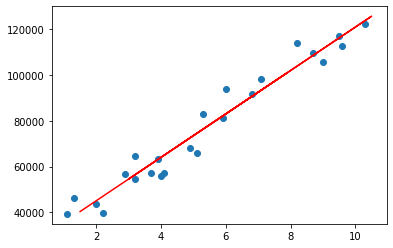

In [12]:
import matplotlib.pyplot as plt 
plt.scatter(X_train , y_train)
plt.plot(X_test , prediction , color = 'red');

# 2) Multiple Linear Regression 

In [13]:
data_multi = pd.read_csv("/content/drive/MyDrive/Machine Learning Data Sets /Regression Data /50_Startups.csv")

In [14]:
data_multi.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:

# Making the data suitable for the model 
data_multi["State"].dtype
X = data_multi.iloc[:,:-1].values
y = data_multi.iloc[:,-1].values 


In [16]:
 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
encoder = OneHotEncoder ()
categorical_features=["State"]
transformer = ColumnTransformer([( "one_hot",
                                encoder , 
                                categorical_features )], 
                               remainder = "passthrough")
# We have converted all the columns in categorical_feature to number, here remainder is all the rest of the columns 
transformed_x = transformer.fit_transform(data_multi)

In [17]:
data_frame = pd.DataFrame(transformed_x)

In [18]:
X = data_frame.iloc[:,:-1]
y = data_frame.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
from sklearn.linear_model import LinearRegression 
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = model_multi.predict(X_test)

In [22]:
print(y_pred.shape)
y_test = np.array(y_test)

(10,)


In [23]:
np.set_printoptions(precision = 2)

print((np.concatenate((y_pred.reshape(len(y_test),1),y_test.reshape(len(y_test),1)),1)))


[[ 82771.58  81005.76]
 [ 64480.11  65200.33]
 [ 73458.43  90708.19]
 [190406.38 191792.06]
 [108514.2  108733.99]
 [192523.22 192261.83]
 [ 66990.85  81229.06]
 [ 96636.87  96778.92]
 [151530.94 152211.77]
 [160409.33 155752.6 ]]


In [24]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9769890825904173

# 3) Polynomial Linear Regression 

In [25]:
data_poly = pd.read_csv("/content/drive/MyDrive/Machine Learning Data Sets /Regression Data /Position_Salaries.csv")

In [26]:
data_poly

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [27]:
data_poly.drop("Position", axis = 1 , inplace = True )

In [28]:
data_poly 

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [29]:
X = data_poly.iloc[:,:-1]
y = data_poly.iloc[:,-1]
print(X.shape)
print(y.shape)

(10, 1)
(10,)


In [30]:
from sklearn.linear_model import LinearRegression
model_poly = LinearRegression()
model_poly.fit(X,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

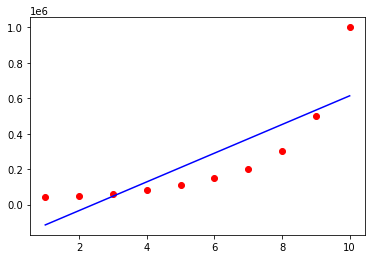

In [31]:

plt.scatter(X,y,color = "red")
plt.plot(X,model_poly.predict(X), color = "blue");

In [32]:
# Now we will convert our dataset in a polynomial dataset
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =4 )
X_poly = poly.fit_transform(X)
new_model = LinearRegression()
new_model.fit(X_poly,y )
print(X_poly)


[[1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [1.00e+00 2.00e+00 4.00e+00 8.00e+00 1.60e+01]
 [1.00e+00 3.00e+00 9.00e+00 2.70e+01 8.10e+01]
 [1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02]
 [1.00e+00 5.00e+00 2.50e+01 1.25e+02 6.25e+02]
 [1.00e+00 6.00e+00 3.60e+01 2.16e+02 1.30e+03]
 [1.00e+00 7.00e+00 4.90e+01 3.43e+02 2.40e+03]
 [1.00e+00 8.00e+00 6.40e+01 5.12e+02 4.10e+03]
 [1.00e+00 9.00e+00 8.10e+01 7.29e+02 6.56e+03]
 [1.00e+00 1.00e+01 1.00e+02 1.00e+03 1.00e+04]]


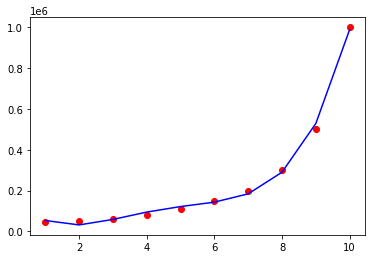

In [33]:
plt.scatter(X,y,color = "red")
plt.plot(X,new_model.predict(X_poly), color ="blue");

In [34]:
model_poly.predict([[6.5]])

array([330378.79])

In [35]:
new_model.predict(poly.fit_transform([[6.5]]))

array([158862.45])

# 4) Support Vector Regression model 

In [36]:
X = data_poly.iloc[:,:-1].values


y = data_poly.iloc[:,-1].values

In [37]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [38]:
y = y.reshape((len(y),1))

In [39]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [40]:
# Now we will do feature scaling on our data set 
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
SC_y = StandardScaler()
X = SC.fit_transform(X)
y = SC_y.fit_transform(y)

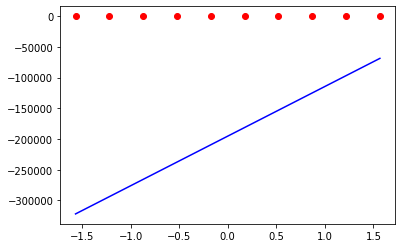

In [41]:

plt.scatter(X,y,color = "red")
plt.plot(X,model_poly.predict(X), color = "blue");

In [42]:
from sklearn.svm import SVR
SVR_model = SVR(kernel = "rbf")
SVR_model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
SC_y.inverse_transform(SVR_model.predict(SC.transform([[6.5]])))


array([170370.02])

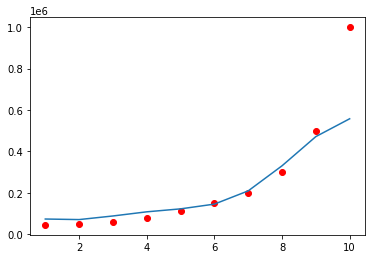

In [44]:
plt.scatter(SC.inverse_transform(X),SC_y.inverse_transform(y),color = "red")
plt.plot(SC.inverse_transform(X),SC_y.inverse_transform(SVR_model.predict(X)))

# 5) Descision Tree Regressor 

In [45]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=0)
X = data_poly.iloc[:,:-1]
y = data_poly.iloc[:,-1]


In [46]:
model_tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [47]:
model_tree.predict([[6.5]])

array([150000.])

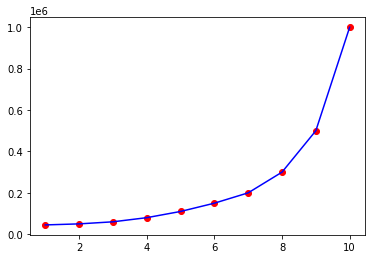

In [48]:
plt.scatter(X,y,color = "red")
plt.plot(X,model_tree.predict(X), color ="blue");